In [10]:
import requests
import pandas as pd
import time
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np



In [11]:
basketball_stats = pd.read_csv("all_seasons.csv")
basketball_stats



,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [12]:
print(basketball_stats.columns)

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


/var/folders/pc/tjms6t8s62s0r4f2rrkm5c340000gp/T/ipykernel_70634/1250487710.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/pc/tjms6t8s62s0r4f2rrkm5c340000gp/T/ipykernel_70634/1250487710.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

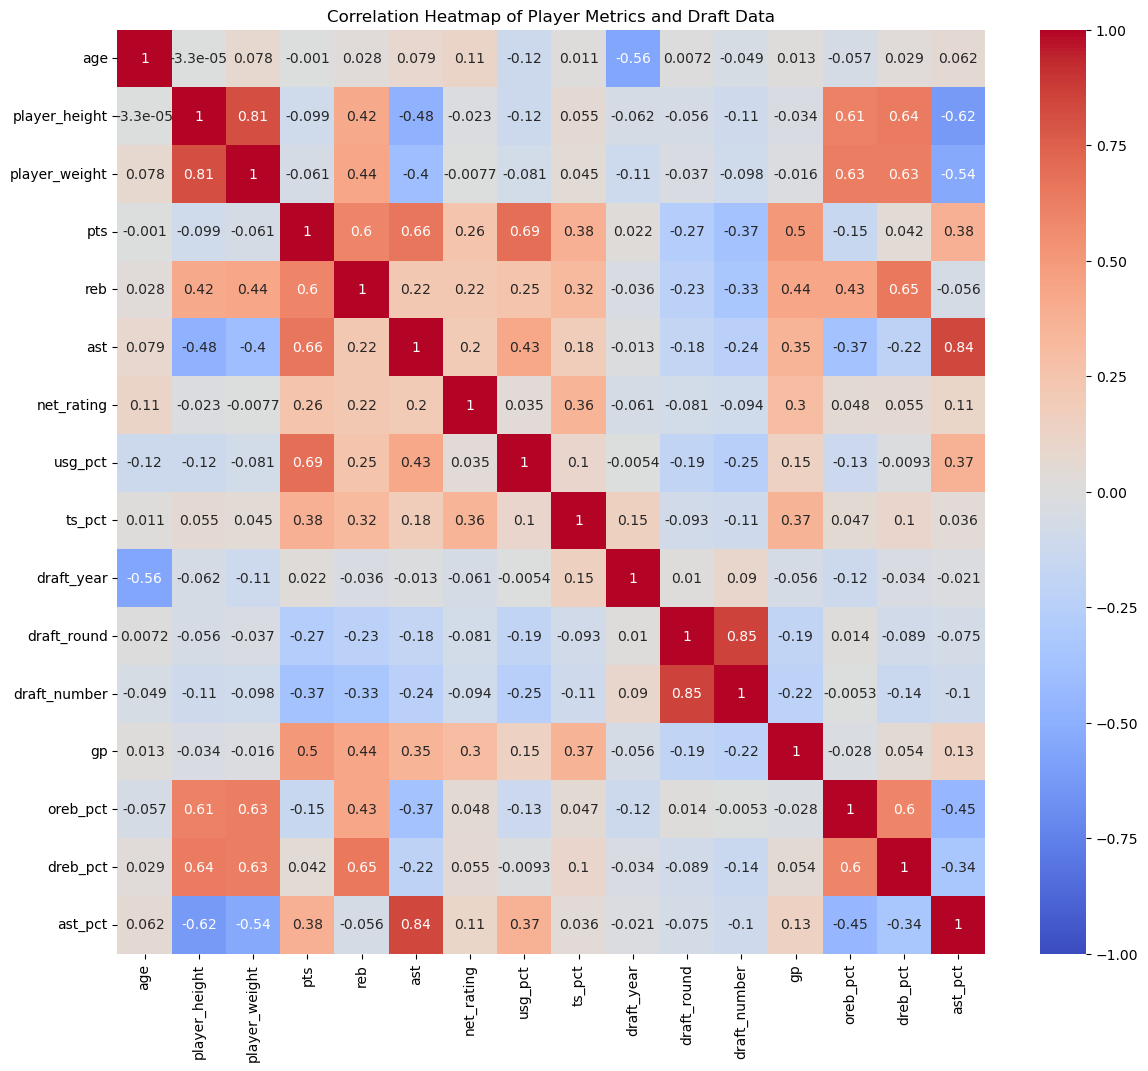

In [13]:
# Replace 'Undrafted' with NaN in draft-related columns
basketball_stats['draft_year'].replace('Undrafted', np.nan, inplace=True)
basketball_stats['draft_round'].replace('Undrafted', np.nan, inplace=True)
basketball_stats['draft_number'].replace('Undrafted', np.nan, inplace=True)

# Convert draft-related columns to numeric, forcing NaN where conversion fails
basketball_stats['draft_year'] = pd.to_numeric(basketball_stats['draft_year'], errors='coerce')
basketball_stats['draft_round'] = pd.to_numeric(basketball_stats['draft_round'], errors='coerce')
basketball_stats['draft_number'] = pd.to_numeric(basketball_stats['draft_number'], errors='coerce')

# Selecting a broader range of numeric metrics to analyze correlations
numeric_columns = basketball_stats[['age', 'player_height', 'player_weight', 'pts', 'reb', 'ast', 
                                    'net_rating', 'usg_pct', 'ts_pct', 'draft_year', 'draft_round', 
                                    'draft_number', 'gp', 'oreb_pct', 'dreb_pct', 'ast_pct']]

# Dropping rows with NaN values in the selected columns
numeric_columns = numeric_columns.dropna()

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap of correlations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Player Metrics and Draft Data")
plt.show()

This correlation heatmap reveals several key relationships amongst the basketball player metrics and draft data. Players with better physical attributes, such as height and weight, are more likely to be drafted earlier, which can be seen by the strong negative correlations between player_height and draft_number (r = -0.54) and between player_weight and draft_round (r = -0.62). Offensive performance metrics, such as points per game (pts) and usage percentage (usg_pct), also show a strong positive correlation (r = 0.69), indicating that players with higher usage rates tend to score more points. Similarly, defensive metrics like defensive rebound percentage (dreb_pct) are strongly correlated with overall rebounding numbers (r = 0.65), emphasizing the contribution of defensive effort to total rebounds. The negative correlation between age and draft_year (r = -0.56) highlights that older players were typically drafted in earlier years. Also, the relationship between draft_round and draft_number (r = 0.85) gives us the expected trend that later draft rounds correspond to higher (worse) draft pick numbers. There are other, less important variables from the heatmap, such as net_rating which give minimal correlations with other variables, suggesting a weak statisitc that doesn't really give much importance to the purpose of the heatmap. 

/var/folders/pc/tjms6t8s62s0r4f2rrkm5c340000gp/T/ipykernel_70634/1627365388.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/pc/tjms6t8s62s0r4f2rrkm5c340000gp/T/ipykernel_70634/1627365388.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




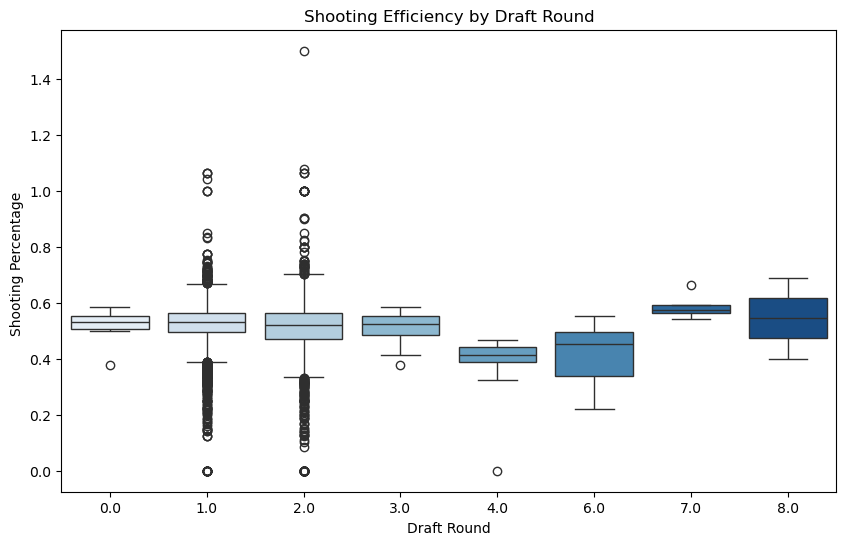

In [14]:
# Replace 'Undrafted' with NaN and convert draft_round to numeric
basketball_stats['draft_round'].replace('Undrafted', pd.NA, inplace=True)
basketball_stats['draft_round'] = pd.to_numeric(basketball_stats['draft_round'], errors='coerce')

# Drop rows with NaN values in 'draft_round' and 'ts_pct' columns
filtered_data = basketball_stats.dropna(subset=['draft_round', 'ts_pct'])

# Create a box plot to show shooting efficiency (ts_pct) by draft round
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='draft_round', y='ts_pct', palette='Blues')

# Adding labels and title
plt.xlabel('Draft Round')
plt.ylabel('Shooting Percentage ')
plt.title('Shooting Efficiency by Draft Round')
plt.show()

The box plot shows the relationship between draft round and shooting efficiency (true shooting percentage ==> ts_pct), revealing that players drafted in earlier rounds generally have higher shooting percentages and greater variability in performance. Earlier rounds (ex: 1st and 2nd) exhibit a broad range of efficiencies, with many outliers suggesting that some players significantly outperform or underperform expectations. Conversely, players drafted in later rounds (ex: 6th to 8th) display lower median shooting percentages and less variability, possibly due to more specialized roles or reduced playing opportunities. Undrafted players (classified as Draft Round 0) show relatively consistent shooting efficiencies, with a narrow range of values indicating moderate success for those who secure playing time. 

In [15]:
# Calculate average points per team
agg_data = basketball_stats.groupby('team_abbreviation', as_index=False)['pts'].mean()

# Create an interactive bar chart
fig = px.bar(
    agg_data,
    x='team_abbreviation',
    y='pts',
    title='Average Points Scored by Players for Each Team',
    labels={'team_abbreviation': 'Team', 'pts': 'Average Points'},
    hover_data={'pts': ':.2f'}
)

# Update layout for interactivity and aesthetics
fig.update_layout(
    xaxis_title="Team",
    yaxis_title="Average Points",
    title_x=0.5,
    showlegend=False
)

# Enable interactive selection by clicking on the bars
fig.update_traces(marker=dict(color="teal"), selector=dict(mode="markers+text"))

fig.show()

The interactive bar chart displays the average points scored by players for each team, showing the comparisons of scoring performance across all NBA teams. The chart shows relatively consistent average points across teams, with most team averages falling between 6 and 8 points per game. This consistency suggests that team scoring contributions are relatively balanced across the league, likely reflecting the standard distribution of roles among players on different teams. Teams such as NOP (New Orleans Pelicans) appear to slightly exceed the league-wide average, while some other teams are slightly below. The minor variation highlights subtle differences in team strategies or player utilization, which might be the cause for the slight discrepancy in values for each team. 

The hover functionality allows users to view precise average points for each team to two decimal places, giving them the ability to explore and compare team data efficiently.